Amazon products
        •https://www.kaggle.com/datasets/ishandutta/amazon-covid19-predatory-pricing-data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = r"C:\Users\ahask\Documents\DA8\Capstone\Capstone\Data\amazon_final.csv"
data = pd.read_csv(file_path)


data.head(3)


,product_name,asin,product_url,brand_name,image_url,mrp,sale_price,discount_percentage,product_description,date_first_available,number_of_reviews,seller_name
0,BHAGIRATH Standard comfort Disposable Pollutio...,B085GL266P,https://www.amazon.in/BHAGIRATH-Standard-Dispo...,Bhagirath fab,https://images-na.ssl-images-amazon.com/images...,16999,199,0.99,IND mask covers the user’s nose and mouth and ...,2020-03-01T00:00:00,0,Bhagirath fab
1,ShopyBucket Standard 3 PCS comfort Disposable ...,B0855V7MQ8,https://www.amazon.in/ShopyBucket-Standard-Dis...,Shopy,https://images-na.ssl-images-amazon.com/images...,798,510,0.36,Dummy text,2020-02-26T00:00:00,0,BasicDeal
2,Gnexin ISI Approved Mask RespiratorPollutionAn...,B084M511KM,https://www.amazon.in/Gnexin-Approved-Respirat...,Gnexin,https://images-na.ssl-images-amazon.com/images...,299,299,0.00,Clair filters presents you Pollution mask ISI ...,2020-02-09T00:00:00,2,ONESENSE ENTERPRISE


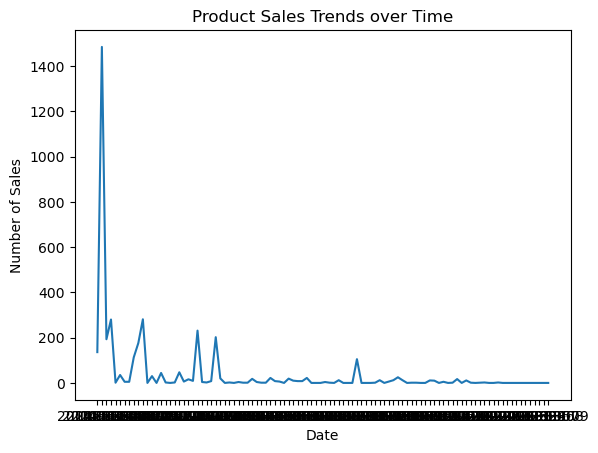

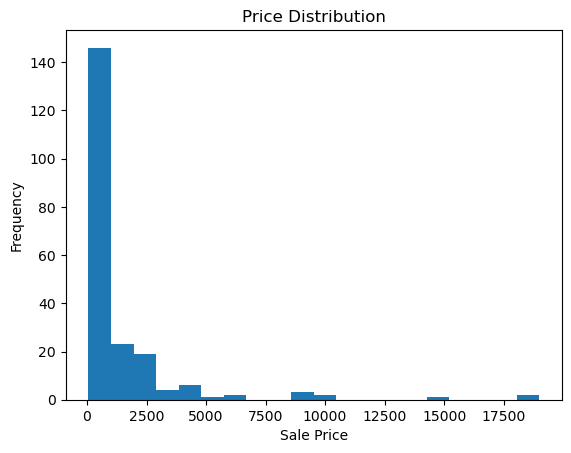

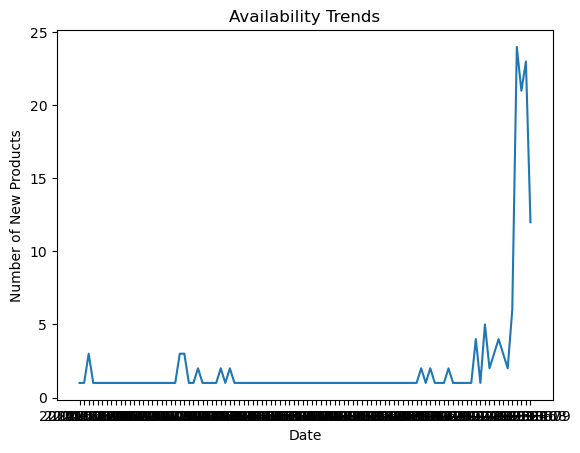

In [11]:
# Product Sales Trends over Time
sales_data = data.groupby('date_first_available')['number_of_reviews'].sum().reset_index()
plt.plot(sales_data['date_first_available'], sales_data['number_of_reviews'])
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.title('Product Sales Trends over Time')
plt.show()

# Price Analysis
plt.hist(data['sale_price'], bins=20)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

# Availability Trends
availability_data = data.groupby('date_first_available').size().reset_index(name='count')
plt.plot(availability_data['date_first_available'], availability_data['count'])
plt.xlabel('Date')
plt.ylabel('Number of New Products')
plt.title('Availability Trends')
plt.show()





In [14]:
sales_data = data.groupby('date_first_available')['number_of_reviews'].sum().reset_index()

#highest selling product and its date
highest_selling_product = data[data['number_of_reviews'] == data['number_of_reviews'].max()]
highest_selling_product_date = highest_selling_product['date_first_available'].iloc[0]

#lowest selling product and its date
lowest_selling_product = data[data['number_of_reviews'] == data['number_of_reviews'].min()]
lowest_selling_product_date = lowest_selling_product['date_first_available'].iloc[0]

print("Highest Selling Product:")
print(highest_selling_product[['product_name', 'date_first_available']])
print("\nLowest Selling Product:")
print(lowest_selling_product[['product_name', 'date_first_available']])


Highest Selling Product:
                                       product_name date_first_available
16  Rudham Disposable Gloves 300 Pieces Transparent           2014-07-14

Lowest Selling Product:
                                          product_name date_first_available
0    BHAGIRATH Standard comfort Disposable Pollutio...           2020-03-01
1    ShopyBucket Standard 3 PCS comfort Disposable ...           2020-02-26
10   Ionix Pack of 10 Disposable Earloop Medical Fa...           2020-03-05
11   Antil's Disposable 3ply Surgical Elastic Face ...           2020-03-07
12   Antil's Disposable 3ply Surgical Elastic Face ...           2020-03-07
..                                                 ...                  ...
204  SARAF Assorted Anti-Dust respiratory Woven Fac...           2020-03-05
205   Agarwals™ Airway Silicon Size 00012346 Pack Of 7           2020-02-23
206                   Saviour Bouffant Cap Pack Of 100           2020-01-09
207  Romsons Vein O Line GS- 3034 Extension 

C:\Users\ahask\AppData\Local\Temp\ipykernel_24820\3183131301.py:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


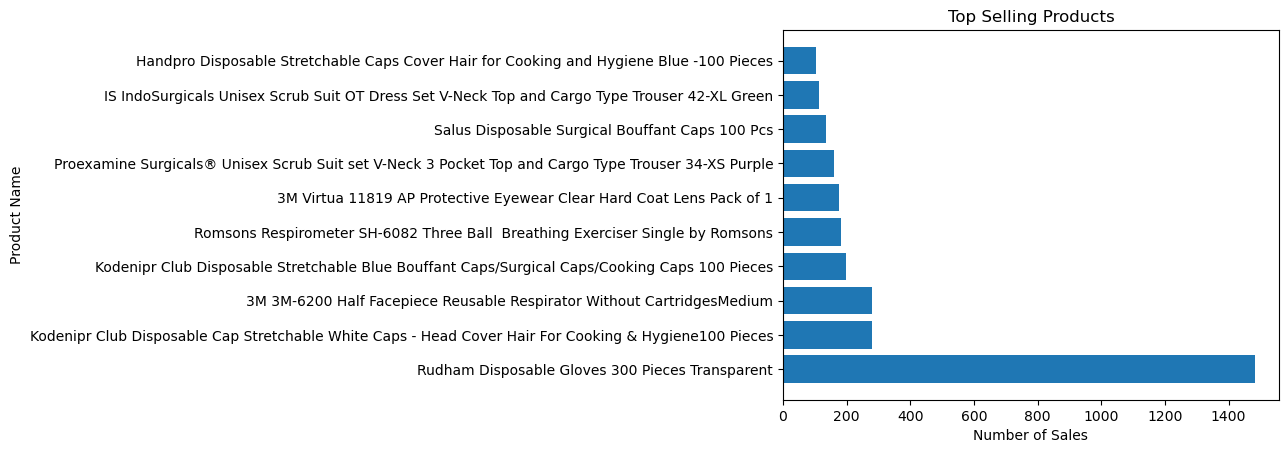

In [16]:
top_selling_products = data.groupby('product_name')['number_of_reviews'].sum().nlargest(10)

plt.barh(top_selling_products.index, top_selling_products.values)
plt.xlabel('Number of Sales')
plt.ylabel('Product Name')
plt.title('Top Selling Products')
plt.tight_layout()

plt.show()


C:\Users\ahask\AppData\Local\Temp\ipykernel_24820\3113160622.py:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


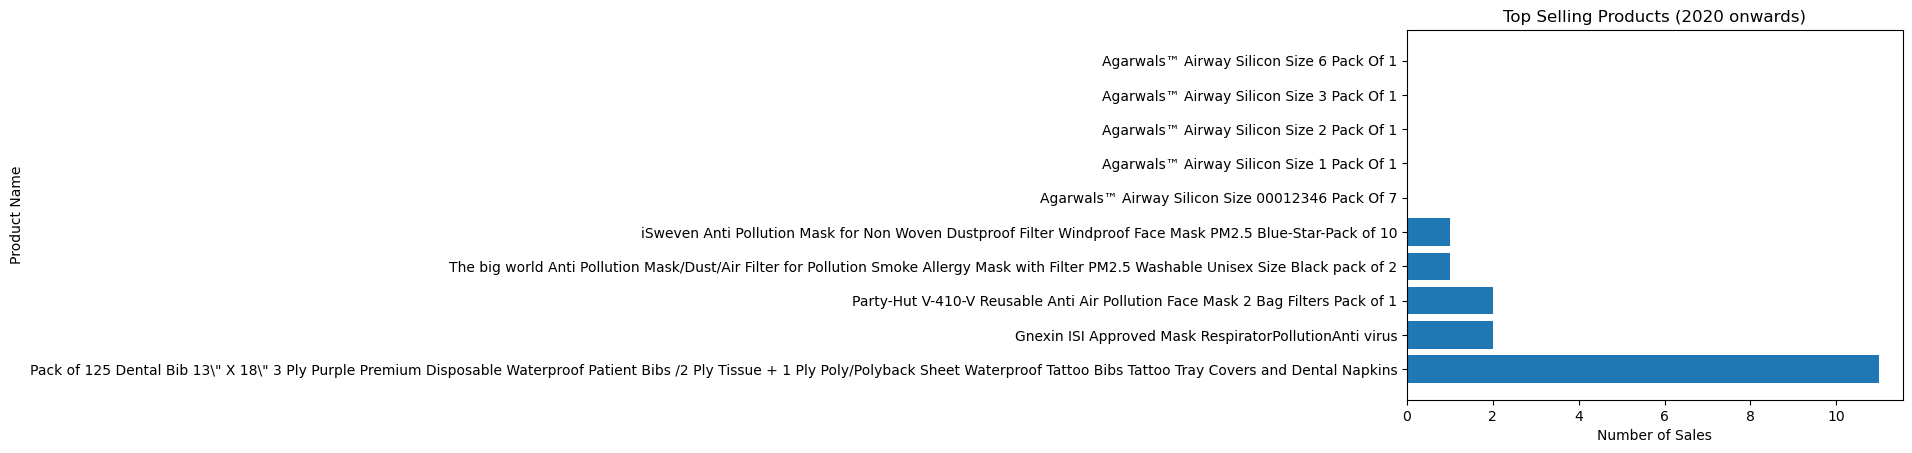

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'date_first_available' to datetime data type
data['date_first_available'] = pd.to_datetime(data['date_first_available'])

# Filter the data for years >= 2020
filtered_data = data[data['date_first_available'].dt.year >= 2020]

# Get the top-selling products based on the number of reviews
top_selling_products = filtered_data.groupby('product_name')['number_of_reviews'].sum().nlargest(10)

# Create a bar chart
plt.barh(top_selling_products.index, top_selling_products.values)
plt.xlabel('Number of Sales')
plt.ylabel('Product Name')
plt.title('Top Selling Products (2020 onwards)')
plt.tight_layout()

# Display the chart
plt.show()



In [19]:
import pandas as pd

# Convert 'date_first_available' to datetime data type
data['date_first_available'] = pd.to_datetime(data['date_first_available'])

# Filter the data for years >= 2020
filtered_data = data[data['date_first_available'].dt.year >= 2020]

# Get the top-selling products based on the number of reviews
top_selling_products = filtered_data.groupby('product_name')['number_of_reviews'].sum().nlargest(10)

# Create a list of top-selling products and their number of sales
top_selling_list = []
for product, sales in top_selling_products.items():
    top_selling_list.append({'Product Name': product, 'Number of Sales': sales})

# Display the list
for item in top_selling_list:
    print(item)


{'Product Name': 'Pack of 125 Dental Bib 13\\" X 18\\" 3 Ply Purple Premium Disposable Waterproof Patient Bibs /2 Ply Tissue + 1 Ply Poly/Polyback Sheet Waterproof Tattoo Bibs Tattoo Tray Covers and Dental Napkins', 'Number of Sales': 11}
{'Product Name': 'Gnexin ISI Approved Mask RespiratorPollutionAnti virus', 'Number of Sales': 2}
{'Product Name': 'Party-Hut V-410-V Reusable Anti Air Pollution Face Mask 2 Bag Filters Pack of 1', 'Number of Sales': 2}
{'Product Name': 'The big world Anti Pollution Mask/Dust/Air Filter for Pollution Smoke Allergy Mask with Filter PM2.5 Washable Unisex Size Black pack of 2', 'Number of Sales': 1}
{'Product Name': 'iSweven Anti Pollution Mask for Non Woven Dustproof Filter Windproof Face Mask PM2.5 Blue-Star-Pack of 10', 'Number of Sales': 1}
{'Product Name': 'Agarwals™ Airway Silicon Size 00012346 Pack Of 7', 'Number of Sales': 0}
{'Product Name': 'Agarwals™ Airway Silicon Size 1 Pack Of 1', 'Number of Sales': 0}
{'Product Name': 'Agarwals™ Airway Sili